In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Resources/alcohol_sales_89_18.csv")

In [3]:
df.head()

,REF_DATE,GEO,DGUID,Type of sales,Type of beverage,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1989,Canada,NaN,Total sales,Total alcoholic beverages,Litres,203,thousands,3,v28463244,1.1.1,189402.0,NaN,NaN,NaN,0
1,1989,Canada,NaN,Total sales,Spirits,Litres,203,thousands,3,v28463245,1.1.2,56542.0,NaN,NaN,NaN,0
2,1989,Canada,NaN,Total sales,Wine,Litres,203,thousands,3,v28463246,1.1.3,26888.0,NaN,NaN,NaN,0
3,1989,Canada,NaN,Total sales,Beer,Litres,203,thousands,3,v28463247,1.1.4,105972.0,NaN,NaN,NaN,0
4,1989,Canada,NaN,Total per capita sales,Total alcoholic beverages,Litres,203,units,0,v28463248,1.2.1,8.8,NaN,NaN,NaN,1


In [4]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Type of sales', 'Type of beverage', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [5]:
alc_sales = df[['REF_DATE','GEO','Type of sales','Type of beverage', "VALUE"]]

In [6]:
alc_sales.head()

,REF_DATE,GEO,Type of sales,Type of beverage,VALUE
0,1989,Canada,Total sales,Total alcoholic beverages,189402.0
1,1989,Canada,Total sales,Spirits,56542.0
2,1989,Canada,Total sales,Wine,26888.0
3,1989,Canada,Total sales,Beer,105972.0
4,1989,Canada,Total per capita sales,Total alcoholic beverages,8.8


In [7]:
alc_sales = alc_sales.rename(columns={"REF_DATE":'Year'})

In [8]:
alc_sales.head()

,Year,GEO,Type of sales,Type of beverage,VALUE
0,1989,Canada,Total sales,Total alcoholic beverages,189402.0
1,1989,Canada,Total sales,Spirits,56542.0
2,1989,Canada,Total sales,Wine,26888.0
3,1989,Canada,Total sales,Beer,105972.0
4,1989,Canada,Total per capita sales,Total alcoholic beverages,8.8


In [9]:
total_sales_df = alc_sales.loc[alc_sales["Type of sales"]== "Total sales",:]

In [10]:
canada_total_sales = total_sales_df.loc[(total_sales_df["GEO"]=="Canada") &(total_sales_df["Type of beverage"]=="Total alcoholic beverages"),:]


In [11]:
canada_total_sales

,Year,GEO,Type of sales,Type of beverage,VALUE
0,1989,Canada,Total sales,Total alcoholic beverages,189402.0
104,1990,Canada,Total sales,Total alcoholic beverages,186540.0
208,1991,Canada,Total sales,Total alcoholic beverages,181709.0
312,1992,Canada,Total sales,Total alcoholic beverages,176556.0
416,1993,Canada,Total sales,Total alcoholic beverages,170156.0
520,1994,Canada,Total sales,Total alcoholic beverages,169841.0
624,1995,Canada,Total sales,Total alcoholic beverages,172101.0
728,1996,Canada,Total sales,Total alcoholic beverages,174273.0
832,1997,Canada,Total sales,Total alcoholic beverages,173390.0
936,1998,Canada,Total sales,Total alcoholic beverages,176693.0


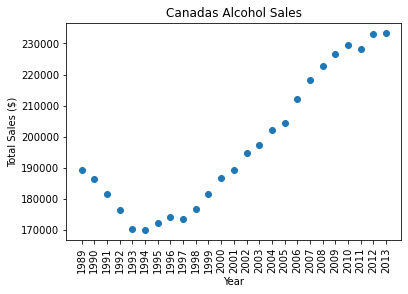

In [12]:
plt.scatter(canada_total_sales["Year"],canada_total_sales["VALUE"])
plt.ylabel("Total Sales ($)")
plt.xlabel("Year")
plt.xticks(canada_total_sales["Year"],rotation="vertical")
plt.title("Canadas Alcohol Sales")
plt.show()

In [40]:
total_sales_df.head()

,Year,GEO,Type of sales,Type of beverage,VALUE
0,1989,Canada,Total sales,Total alcoholic beverages,189402.0
1,1989,Canada,Total sales,Spirits,56542.0
2,1989,Canada,Total sales,Wine,26888.0
3,1989,Canada,Total sales,Beer,105972.0
8,1989,Newfoundland and Labrador,Total sales,Total alcoholic beverages,4245.0


In [41]:
provincial_total_sales = total_sales_df.loc[(total_sales_df["GEO"]!="Canada")&
                                            (total_sales_df["Type of beverage"]=="Total alcoholic beverages")]

In [115]:
provincial_total_sales =provincial_total_sales.rename(columns={"GEO":"Province","VALUE":"Total Sales"})

In [116]:
provincial_total_sales = provincial_total_sales.fillna(0)
provincial_total_sales 

,Year,Province,Type of sales,Type of beverage,Total Sales
8,1989,Newfoundland and Labrador,Total sales,Total alcoholic beverages,4245.0
16,1989,Prince Edward Island,Total sales,Total alcoholic beverages,790.0
24,1989,Nova Scotia,Total sales,Total alcoholic beverages,5921.0
32,1989,New Brunswick,Total sales,Total alcoholic beverages,3988.0
40,1989,Quebec,Total sales,Total alcoholic beverages,44465.0
...,...,...,...,...,...
2680,2013,British Columbia,Total sales,Total alcoholic beverages,31754.0
2688,2013,Yukon,Total sales,Total alcoholic beverages,392.0
2696,2013,Northwest Territories including Nunavut,Total sales,Total alcoholic beverages,0.0
2704,2013,Northwest Territories,Total sales,Total alcoholic beverages,409.0


In [118]:
group_provincial_total_sales = provincial_total_sales.groupby(["Province","Year"]).sum()
# group_provincial_total_sales["VALUE"].max()
test = group_provincial_total_sales.reset_index()
test

,Province,Year,Total Sales
0,Alberta,1989,18116.0
1,Alberta,1990,17826.0
2,Alberta,1991,17753.0
3,Alberta,1992,17720.0
4,Alberta,1993,17080.0
...,...,...,...
323,Yukon,2009,357.0
324,Yukon,2010,377.0
325,Yukon,2011,382.0
326,Yukon,2012,389.0


In [13]:
can_total_capita = alc_sales.loc[(alc_sales["Type of sales"]== "Total per capita sales")&
                                 (alc_sales["Type of beverage"]=="Total alcoholic beverages")&
                                 (alc_sales["GEO"]=="Canada")
                                 ,:]

In [14]:
can_total_capita

,Year,GEO,Type of sales,Type of beverage,VALUE
4,1989,Canada,Total per capita sales,Total alcoholic beverages,8.8
108,1990,Canada,Total per capita sales,Total alcoholic beverages,8.5
212,1991,Canada,Total per capita sales,Total alcoholic beverages,8.2
316,1992,Canada,Total per capita sales,Total alcoholic beverages,7.8
420,1993,Canada,Total per capita sales,Total alcoholic beverages,7.5
524,1994,Canada,Total per capita sales,Total alcoholic beverages,7.4
628,1995,Canada,Total per capita sales,Total alcoholic beverages,7.4
732,1996,Canada,Total per capita sales,Total alcoholic beverages,7.4
836,1997,Canada,Total per capita sales,Total alcoholic beverages,7.2
940,1998,Canada,Total per capita sales,Total alcoholic beverages,7.3


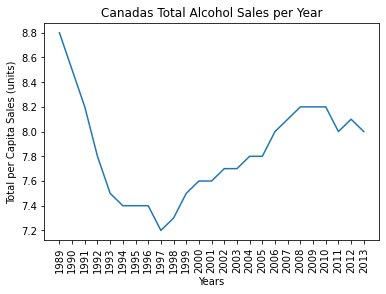

In [15]:
plt.plot(can_total_capita["Year"],can_total_capita["VALUE"])
plt.xticks(can_total_capita["Year"],rotation = "vertical")
plt.ylabel("Total per Capita Sales (units)")
plt.xlabel("Years")
plt.title("Canadas Total Alcohol Sales per Year")
plt.show()

In [20]:
df2 = pd.read_csv("Resources/sales_data_value_alcohol.csv")
df2

,REF_DATE,GEO,DGUID,Value and volume,Type of beverage,Type of product,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1993,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10425421,NaN,NaN,NaN,0
1,1994,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10319303,NaN,NaN,NaN,0
2,1995,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10398702,NaN,NaN,NaN,0
3,1996,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10655115,NaN,NaN,NaN,0
4,1997,Canada,NaN,Value in dollars,Total beverages,Total products,Dollars,81,thousands,3,v20856629,1.1.1.1,10981893,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2009,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,310678,NaN,NaN,NaN,0
1235,2010,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,302105,NaN,NaN,NaN,0
1236,2011,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,320337,NaN,NaN,NaN,0
1237,2012,Canada,NaN,Value in dollars,Unidentified wines,Import products,Dollars,81,thousands,3,v31185916,1.1.20.3,338616,NaN,NaN,NaN,0


In [21]:
can_sales = df2[['REF_DATE','GEO','Type of product','Type of beverage', "VALUE"]]

In [23]:
can_sales = can_sales.loc[(can_sales["GEO"]=="Canada")&
                         (can_sales["Type of product"]=='Total products')&
                         (can_sales["Type of beverage"]=="Total beverages")]

In [33]:
can_sales = can_sales.rename(columns={"REF_DATE":"Year","VALUE":"Total Sales"})
can_sales

,Year,GEO,Type of product,Type of beverage,Total Sales
0,1993,Canada,Total products,Total beverages,10425421
1,1994,Canada,Total products,Total beverages,10319303
2,1995,Canada,Total products,Total beverages,10398702
3,1996,Canada,Total products,Total beverages,10655115
4,1997,Canada,Total products,Total beverages,10981893
5,1998,Canada,Total products,Total beverages,11713647
6,1999,Canada,Total products,Total beverages,12375387
7,2000,Canada,Total products,Total beverages,13021576
8,2001,Canada,Total products,Total beverages,13455472
9,2002,Canada,Total products,Total beverages,14339190


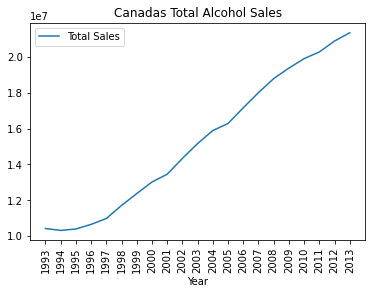

In [98]:
can_sales.plot(kind="line",x="Year",y="Total Sales")
plt.xticks(can_sales["Year"],rotation="vertical")
plt.title("Canadas Total Alcohol Sales")
plt.show()